In [1]:
import pandas as pd

confirmed = pd.read_csv("https://exoplanetarchive.ipac.caltech.edu/TAP/sync?query=select+*+from+ps&format=csv")


/var/folders/f6/g40wkt31081__rgmtbr2q2l00000gn/T/ipykernel_38194/3954156754.py:3: DtypeWarning: Columns (3,4,50,65,153,183,187,206,211) have mixed types. Specify dtype option on import or set low_memory=False.
  confirmed = pd.read_csv("https://exoplanetarchive.ipac.caltech.edu/TAP/sync?query=select+*+from+ps&format=csv")


In [2]:
confirmed['disc_facility']

0        Kepler
1        Kepler
2        Kepler
3        Kepler
4        Kepler
          ...  
38177    Kepler
38178    Kepler
38179    Kepler
38180    Kepler
38181    Kepler
Name: disc_facility, Length: 38182, dtype: object

In [3]:
confirmed_tess = confirmed[confirmed['disc_facility'].str.contains("TESS", na=False)]

In [4]:
confirmed_tess_unique = confirmed_tess.drop_duplicates(subset="pl_name")
confirmed_tess_unique

,pl_name,pl_letter,hostname,hd_name,hip_name,tic_id,gaia_id,default_flag,pl_refname,sy_refname,...,sy_jmagerr1,sy_jmagerr2,sy_jmagstr,sy_hmag,sy_hmagerr1,sy_hmagerr2,sy_hmagstr,sy_kmag,sy_kmagerr1,sy_kmagerr2
6869,pi Men c,c,HD 39091,HD 39091,HIP 26394,TIC 261136679,Gaia DR2 4623036865373793408,1,<a refstr=DAMASSO_ET_AL__2020 href=https://ui....,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,...,0.272,-0.272,4.869&plusmn;0.272,4.424,0.226,-0.226,4.424&plusmn;0.226,4.241000,0.027,-0.027
7008,LHS 3844 b,b,LHS 3844,NaN,NaN,TIC 410153553,Gaia DR2 6385548541499112448,1,<a refstr=VANDERSPEK_ET_AL__2019 href=https://...,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,...,0.023,-0.023,10.046&plusmn;0.023,9.477,0.023,-0.023,9.477&plusmn;0.023,9.145001,0.023,-0.023
7012,HD 202772 A b,b,HD 202772 A,HD 202772 A,NaN,TIC 290131778,Gaia DR2 6790773586275235200,1,<a refstr=WANG_ET_AL__2019 href=https://ui.ads...,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,...,0.026,-0.026,7.232&plusmn;0.026,7.048,0.021,-0.021,7.048&plusmn;0.021,6.959000,0.024,-0.024
7035,GJ 143 b,b,GJ 143,HD 21749,HIP 16069,TIC 279741379,Gaia DR2 4673947174316727040,0,<a refstr=EXOFOP_TESS_TOI href=https://exofop....,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,...,0.020,-0.020,6.081&plusmn;0.020,5.524,0.031,-0.031,5.524&plusmn;0.031,5.375000,0.024,-0.024
7038,HD 23472 b,b,HD 23472,HD 23472,HIP 17264,TIC 425997655,Gaia DR2 4674216245427964416,0,<a refstr=EXOFOP_TESS_TOI href=https://exofop....,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,...,0.024,-0.024,7.865&plusmn;0.024,7.347,0.029,-0.029,7.347&plusmn;0.029,7.207000,0.023,-0.023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15326,HD 21520 b,b,HD 21520,HD 21520,HIP 16038,TIC 404518509,Gaia DR2 4847732649308331648,1,<a refstr=NIES_ET_AL__2024 href=https://ui.ads...,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,...,0.030,-0.030,8.048&plusmn;0.030,7.764,0.042,-0.042,7.764&plusmn;0.042,7.707000,0.016,-0.016
15329,HIP 67522 c,c,HIP 67522,HD 120411,HIP 67522,TIC 166527623,Gaia DR2 6113920619134019456,1,<a refstr=BARBER_ET_AL__2024 href=https://ui.a...,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,...,0.021,-0.021,8.587&plusmn;0.021,8.287,0.042,-0.042,8.287&plusmn;0.042,8.164000,0.026,-0.026
15495,TOI-2443 b,b,TOI-2443,NaN,HIP 12493,TIC 318753380,Gaia DR2 2501948402746099456,1,<a refstr=NAPONIELLO_ET_AL__2025 href=https://...,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,...,0.021,-0.021,7.260&plusmn;0.021,6.692,0.046,-0.046,6.692&plusmn;0.046,6.500000,0.018,-0.018
15611,TOI-1266 d,d,TOI-1266,NaN,NaN,TIC 467179528,Gaia DR2 1678074272650459008,0,<a refstr=CLOUTIER_ET_AL__2024 href=https://ui...,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,...,0.023,-0.023,9.706&plusmn;0.023,9.065,0.030,-0.030,9.065&plusmn;0.030,8.840000,0.020,-0.020


In [22]:
import lightkurve as lk
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import pickle
import astropy.units as u

In [6]:
planet_names = confirmed_tess_unique["pl_name"].dropna().tolist()

In [11]:
def fold(lc, period, t0):
    t0_btjd = t0 - 2457000
    return lc.fold(period=period, epoch_time=t0_btjd)

class TESSPlanetTransit:
    def __init__(self, name, period=None, t0=None, lc = None):
        self.name = name
        self.period = period
        self.t0 = t0
        folded_lc = fold(lc, period, t0)
        self.time = folded_lc.time.value
        self.flux = folded_lc.flux.value
    
    


I only downloaded 1 dataset (1 sector) for each TESS planet, and then phase-folded the dataset. This is probably not the best idea... But downloading all the datasets took forever! It might also be better to not phase-fold.

In [26]:
transits = []
for planet in tqdm(planet_names):
    search = lk.search_lightcurve(planet, mission="TESS", author="SPOC")
    if len(search) > 0:
        search = search[search.exptime < 200 * u.s]
    if len(search) > 0:
        # result = search.download_all()
        # lc = result.stitch()
        result = search[0]
        lc = result.download()
        row = confirmed_tess_unique[confirmed_tess_unique["pl_name"] == planet]
        period = row["pl_orbper"].values[0]
        t0 = row["pl_tranmid"].values[0]
        if np.isnan(period) or np.isnan(t0):
            continue
        transit = TESSPlanetTransit(planet, period, t0, lc)
        transits.append(transit)
with open("transits.pkl", "wb") as f:
    pickle.dump(transits, f)

100%|██████████| 620/620 [3:18:13<00:00, 19.18s/it]


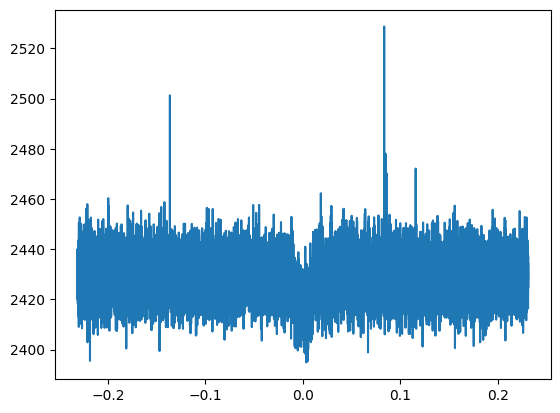

In [33]:
plt.plot(transits[1].time, transits[1].flux)